In [69]:
import nibabel as nib
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pydicom
import dicom2nifti
from scipy import ndimage
from deepbet import run_bet

In [4]:
input = 'temporary_ct_data/dicom/NIZFK/'
output = 'temporary_ct_data/nifti/'
dicom2nifti.convert_directory(input, output, compression=True, reorient=True)

In [142]:
dir_file = 'temporary_ct_data/nifti/JEOSE_brain.nii.gz'
# dir_file = 'brain.nii.gz'
img = nib.load(dir_file)
img_data = img.get_fdata()

In [138]:
img_data.shape

(512, 512, 47)

Dimension of the CT scan is: (512, 512, 47)


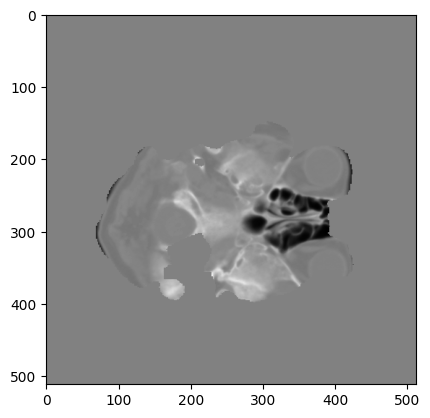

In [143]:
print("Dimension of the CT scan is:", img_data.shape)
plt.imshow(np.squeeze(img_data[:, :, 10]), cmap="gray")

In [136]:
input_paths = ['temporary_ct_data/nifti/2_head__50__h31s.nii.gz']
brain_paths = ['brain.nii.gz']
mask_paths = ['']
tiv_paths = ['']

# run_bet(input_paths, brain_paths, mask_paths, tiv_paths, threshold=.5, n_dilate=0, no_gpu=True)
run_bet(input_paths, brain_paths, threshold=.5, n_dilate=0, no_gpu=True)

In [126]:
axial = img_data[:, :, img_data.shape[2] // 2]
coronal = img_data[:, img_data.shape[1] // 2, :]
sagittal = img_data[img_data.shape[0] // 2, :, :]

x_dim, y_dim, _ = img.header.get_zooms()
aspect_ratio = y_dim / x_dim

In [130]:
plt.figure(figsize=(8, 8 * aspect_ratio), dpi=200)
plt.imshow(sagittal.T, cmap='gray', origin='lower', aspect='auto')
plt.axis('off')
plt.savefig('./temporary_ct_data/', bbox_inches='tight', pad_inches=0, dpi=200)
plt.close()

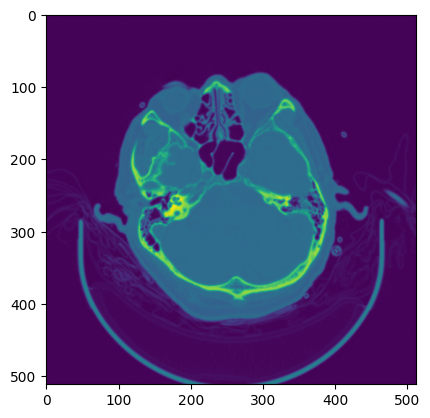

In [44]:
import pydicom as dicom

# specify your image path
image_path = 'temporary_ct_data/dicom/0C4LP/5.dcm'
ds = dicom.dcmread(image_path)

pixel_array_numpy = ds.pixel_array

plt.imshow(pixel_array_numpy)
# image_format = '.jpg' # or '.png'
# image_path = image_path.replace('.dcm', image_format)

# cv2.imwrite(image_path, pixel_array_numpy)